# Clustering NBA Teams

In [49]:
import pandas as pd
import numpy as np
import plotly.express as px
import pickle
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from plotly.offline import init_notebook_mode
init_notebook_mode(connected = True)
import plotly.io as pio



# Importing Dataset

In [50]:
# importing team data

teams=pd.read_csv('NBA_Team_Data_1999-2020.csv',index_col=0)



In [51]:
# important team statistics 

team_stats=teams.drop(['TEAM','YEAR','GP','W','L','MIN'],axis=1)

In [52]:
team_stats.columns

Index(['WIN%', 'PTS', 'FGM', 'FGA', 'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA',
       'FT%', 'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'BLKA', 'PF',
       'PFD', '+/-', 'OFFRTG', 'DEFRTG', 'NETRTG', 'AST%', 'AST/TO',
       'AST\nRATIO', 'OREB%', 'DREB%', 'REB%', 'TOV%', 'EFG%', 'TS%', 'PACE',
       'PIE', 'POSS'],
      dtype='object')

In [53]:
len(team_stats.columns)

37

In [54]:
team_stats

,WIN%,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,...,AST\nRATIO,OREB%,DREB%,REB%,TOV%,EFG%,TS%,PACE,PIE,POSS
0,0.341,94.3,36.6,83.0,44.1,3.1,9.9,31.7,18.0,24.2,...,14.6,33.4,69.8,51.6,16.4,46.0,50.3,93.55,46.2,7731
1,0.427,99.3,37.2,83.9,44.4,5.1,15.4,33.1,19.8,26.5,...,15.9,32.7,70.5,50.6,15.9,47.4,52.0,96.19,47.6,7918
2,0.598,98.4,35.8,79.7,44.9,4.1,12.2,33.9,22.7,30.0,...,18.4,28.3,71.2,50.1,15.3,47.5,53.0,95.58,54.1,7876
3,0.207,84.8,31.3,75.4,41.5,4.1,12.6,32.9,18.1,25.5,...,15.8,33.1,67.6,49.9,20.8,44.3,49.0,90.93,41.7,7492
4,0.390,97.0,36.3,82.1,44.2,4.2,11.2,37.3,20.2,26.9,...,17.3,30.8,68.5,49.6,17.7,46.8,51.6,97.36,47.5,8051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
620,0.431,110.1,40.9,88.4,46.2,12.7,34.9,36.4,15.7,20.3,...,17.4,25.8,73.6,49.2,14.4,53.4,56.6,99.60,47.9,7239
621,0.451,114.1,42.2,89.4,47.2,10.7,28.5,37.6,19.0,23.4,...,17.9,23.3,75.1,49.5,12.3,53.1,57.2,101.14,50.2,7249
622,0.736,112.8,40.2,87.9,45.8,13.8,37.0,37.4,18.5,23.2,...,18.1,25.6,72.1,49.6,14.6,53.6,57.4,101.19,53.0,7328
623,0.611,111.3,40.1,85.1,47.1,13.4,35.2,38.0,17.8,22.8,...,16.8,26.1,74.6,51.2,15.2,54.9,58.5,99.15,51.3,7169


# Normalizing Team Stats Data

In [55]:
scaler = MinMaxScaler()
scaler.fit(team_stats)
normalized_team_stats=scaler.transform(team_stats)
normalized_team_stats=pd.DataFrame(normalized_team_stats)
normalized_team_stats.columns=team_stats.columns
normalized_team_stats

,WIN%,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,...,AST\nRATIO,OREB%,DREB%,REB%,TOV%,EFG%,TS%,PACE,PIE,POSS
0,0.299745,0.292754,0.417323,0.441624,0.343750,0.044118,0.055851,0.282609,0.487395,0.510067,...,0.070423,0.751592,0.398438,0.715909,0.505618,0.226950,0.253731,0.339956,0.300000,0.664827
1,0.409439,0.437681,0.464567,0.487310,0.375000,0.191176,0.202128,0.384058,0.638655,0.664430,...,0.253521,0.707006,0.453125,0.602273,0.449438,0.326241,0.380597,0.485651,0.382353,0.733628
2,0.627551,0.411594,0.354331,0.274112,0.427083,0.117647,0.117021,0.442029,0.882353,0.899329,...,0.605634,0.426752,0.507812,0.545455,0.382022,0.333333,0.455224,0.451987,0.764706,0.718175
3,0.128827,0.017391,0.000000,0.055838,0.072917,0.117647,0.127660,0.369565,0.495798,0.597315,...,0.239437,0.732484,0.226562,0.522727,1.000000,0.106383,0.156716,0.195364,0.035294,0.576895
4,0.362245,0.371014,0.393701,0.395939,0.354167,0.125000,0.090426,0.688406,0.672269,0.691275,...,0.450704,0.585987,0.296875,0.488636,0.651685,0.283688,0.350746,0.550221,0.376471,0.782561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
620,0.414541,0.750725,0.755906,0.715736,0.562500,0.750000,0.720745,0.623188,0.294118,0.248322,...,0.464789,0.267516,0.695312,0.443182,0.280899,0.751773,0.723881,0.673841,0.400000,0.483812
621,0.440051,0.866667,0.858268,0.766497,0.666667,0.602941,0.550532,0.710145,0.571429,0.456376,...,0.535211,0.108280,0.812500,0.477273,0.044944,0.730496,0.768657,0.758830,0.535294,0.487491
622,0.803571,0.828986,0.700787,0.690355,0.520833,0.830882,0.776596,0.695652,0.529412,0.442953,...,0.563380,0.254777,0.578125,0.488636,0.303371,0.765957,0.783582,0.761589,0.700000,0.516556
623,0.644133,0.785507,0.692913,0.548223,0.656250,0.801471,0.728723,0.739130,0.470588,0.416107,...,0.380282,0.286624,0.773438,0.670455,0.370787,0.858156,0.865672,0.649007,0.600000,0.458057


# Function to Visualize NBA Team Clusters

In [62]:
""" Visualize KMeans Clustering of NBA Teams

Args:
    normalized_df: normalized team stats df to cluster
    teams: teams df
    stats: team statistics df
    components: number of components to visualize 2 or 3
    color: what feature color scatter points by 
    hover_data: data to see on plotly scatterplot hover


Returns:
    pca: dataframe with principal components
    knn: Kmeans object trained on data

Raises:
    Exception(): Invalid input

"""

def visualize_KMeans_clustering(normalized_df,teams,stats,k,components,color='Clusters',hover_data=['WIN%','TEAM'],output=False):
    
    if components!=2 and components!=3:
        raise Exception("Invalid component: '{}' - Must select 2 or 3".format(components))
    
    
    # 2 principal components
    
    if components==2:
        
        # fitting clusters on normalized data
        
        knn=KMeans(n_clusters=k,random_state=0)
        df_fit=normalized_df.copy()
        
        # adding more weight to winning percentage
        
        df_fit['WIN%']=df_fit['WIN%']*2.5
        knn.fit(df_fit)
        
        # dimensionality reduction w/ PCA
        
        pca = PCA(n_components=2)
        components = pca.fit_transform(normalized_df)
        pca=pd.DataFrame(data=components,  columns=["PC1", "PC2"])
        
        pca['TEAM']=teams['TEAM']+" "+teams['YEAR']
        pca['Clusters']=knn.labels_
        pca['Clusters']=pca['Clusters'].astype('O')
        
        pca=pd.concat([pca,stats],axis=1)
        
        # visualizing w/ plotly 
        
        fig = px.scatter(pca, x='PC1', y='PC2',color=color,hover_data=hover_data,title='NBA Team 1999-2020')
        fig.show(renderer="svg")
        
        # returning df and trained object
        if output!=False:
            return pca,knn
    
    else:
        
        # same as above but 3 principal components
        
        knn=KMeans(n_clusters=k,random_state=0)
        df_fit=normalized_df.copy()
        df_fit['WIN%']=df_fit['WIN%']*2
        knn.fit(df_fit)
        
        pca = PCA(n_components=3)
        components = pca.fit_transform(normalized_df)
        
        total_var = pca.explained_variance_ratio_.sum() * 100
        
        pca=pd.DataFrame(data=components,  columns=["PC1", "PC2","PC3"])
        
        pca['TEAM']=teams['TEAM']+" "+teams['YEAR']
        pca['Clusters']=knn.labels_
        pca['Clusters']=pca['Clusters'].astype('O')
        
        pca=pd.concat([pca,stats],axis=1)
        
        
        fig = px.scatter_3d(pca, x='PC1', y='PC2', z='PC3',color=color,hover_data=hover_data,title=f'Total Explained Variance: {total_var:.2f}%',labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'})
        fig.show(renderer="svg")
        
        if output!=False:
            return pca,knn
    



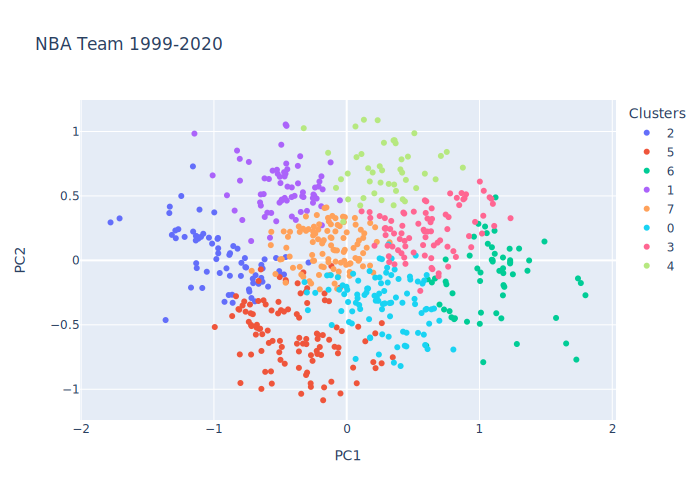

In [63]:
df,knn=visualize_KMeans_clustering(normalized_team_stats,teams,team_stats,8,2,hover_data=['WIN%','TEAM','POSS','3PM','REB','FGM'],output=True)

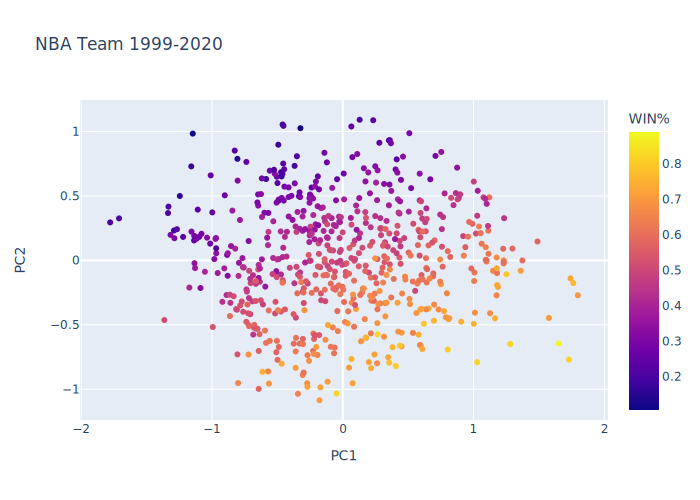

In [64]:
visualize_KMeans_clustering(normalized_team_stats,teams,team_stats,8,2,color='WIN%')

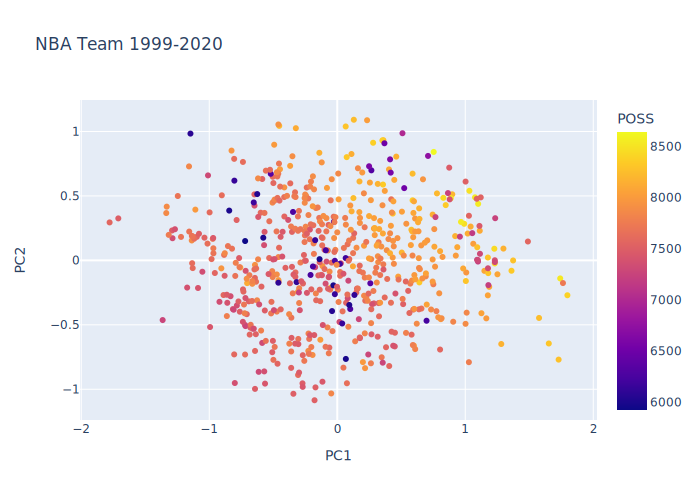

In [65]:
visualize_KMeans_clustering(normalized_team_stats,teams,team_stats,8,2,color='POSS')

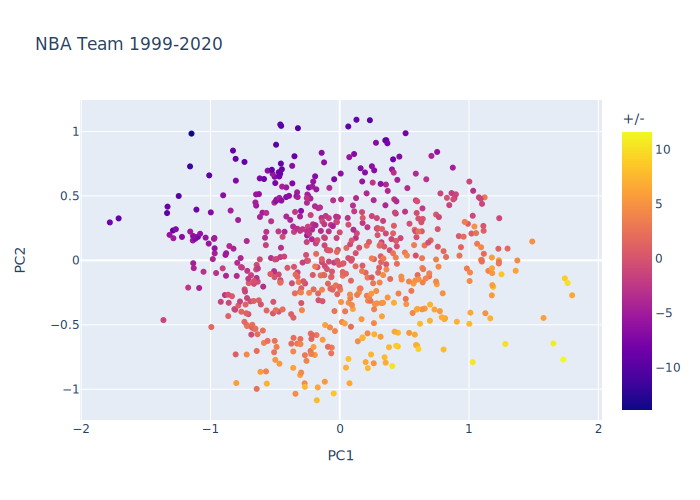

In [66]:
visualize_KMeans_clustering(normalized_team_stats,teams,team_stats,8,2,color='+/-')

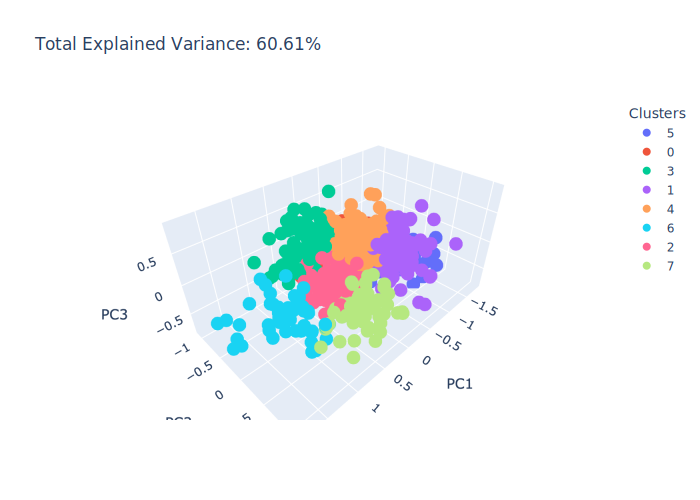

In [67]:
visualize_KMeans_clustering(normalized_team_stats,teams,team_stats,8,3,color='Clusters')

# Saving KMeans Object for Python Module

In [39]:
pickle.dump(knn, open( "knn.pkl", "wb" ))

In [170]:
# testing object
kmeans_object=pd.read_pickle('knn.pkl')

In [179]:
# predicting cluster sample team data

normalized_team_stats.iloc[6]


WIN%          0.409439
PTS           0.428986
FGM           0.472441
FGA           0.507614
FG%           0.354167
3PM           0.235294
3PA           0.244681
3P%           0.420290
FTM           0.546218
FTA           0.617450
FT%           0.367816
OREB          0.625000
DREB          0.307190
REB           0.527027
AST           0.453846
TOV           0.564103
STL           0.270833
BLK           0.879310
BLKA          0.666667
PF            0.695238
PFD           0.097276
+/-           0.462745
OFFRTG        0.445344
DEFRTG        0.481013
NETRTG        0.481061
AST%          0.600000
AST/TO        0.432432
AST\nRATIO    0.436620
OREB%         0.668790
DREB%         0.320312
REB%          0.579545
TOV%          0.471910
EFG%          0.340426
TS%           0.358209
PACE          0.472406
PIE           0.423529
POSS          0.743194
Name: 6, dtype: float64

In [180]:
kmeans_object.predict(np.asarray(normalized_team_stats.iloc[6]).reshape(1, -1))

array([5], dtype=int32)